In [8]:
# import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # make predictions
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    # draw contour plot
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}',
                    edgecolor='black')

    # add legend
    plt.legend(loc='upper left')
    plt.show()


[]

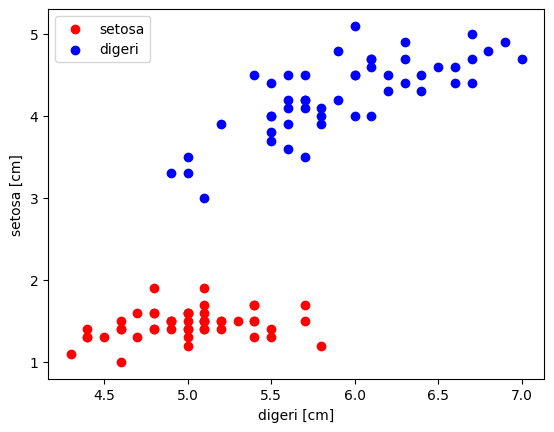

In [11]:
# Importing the dataset

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding="utf-8")

# This .iloc function gives us the ability to visualize data based on rows and coloumns we choose.
y = df.iloc[0:100, 4].values
y = np.where( y == "Iris-setosa", 0, 1)
x = df.iloc[0:100, [0,2]].values

# plot configs.
plt.scatter( x[0:50, 0], x[0:50, 1] , marker = 'o', color = 'r', label = "setosa" )
plt.scatter( x[50:100, 0], x[50:100, 1] , marker = 'o', color = 'b', label = "digeri" )
plt.xlabel('digeri [cm]')
plt.ylabel('setosa [cm]')
plt.legend(loc="upper left")
plt.plot()

In [ ]:
X.shape[1]

In [39]:
class AdaLineGD:
    def __init__( self, eta = 0.01 , n_iter = 10 ): 
        self.eta = eta
        self.n_iter = n_iter

    def fit( self, X, y ):
        rgen = np.random.RandomState(0)
        self.w_ = rgen.normal( loc = 0.0, scale = 0.01, size = X.shape[1] )
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.netInput( X )
            output = self.activation(net_input)
            error = ( y - output )
            self.w_ += self.eta * 2 * X.T.dot(error) / X.shape[0]
            self.b_ += self.eta * 2 * error.mean()
            loss = (error**2).mean()
            self.losses_.append(loss)
        return self
            
    def netInput( self, X ):
        return ( np.dot( X, self.w_ ) + self.b_ )
        
    def activation( self, X ):
        return X

    def predict( self, X ):
        return np.where( self.activation( self.netInput( X ) ) >= 0.5, 1, 0 )

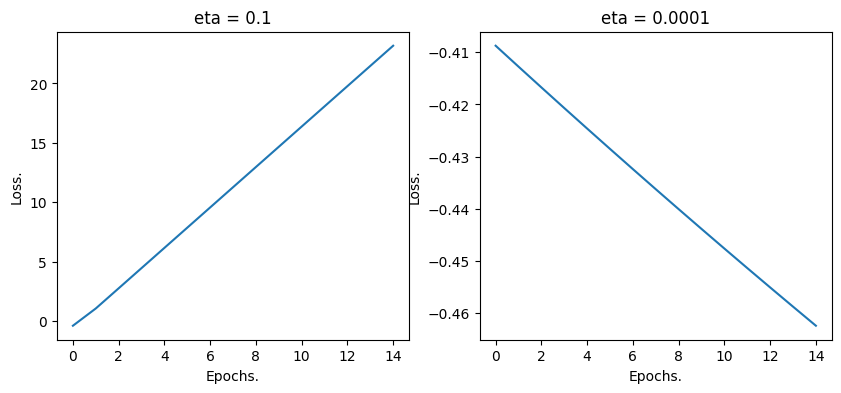

In [17]:
fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize=(10,4 ))

ada1 = AdaLineGD( eta = 0.1, n_iter = 15 ).fit(X ,y)
ada2 = AdaLineGD( eta = 0.0001, n_iter = 15 ).fit(X ,y)

ax[0].plot( np.arange( len( ada1.losses_ ) ), np.log10(ada1.losses_ ) )
ax[0].set_xlabel("Epochs.")
ax[0].set_ylabel("Loss.")
ax[0].set_title ("eta = 0.1")

ax[1].plot( np.arange( len( ada2.losses_ ) ), np.log10(ada2.losses_) )
ax[1].set_xlabel("Epochs.")
ax[1].set_ylabel("Loss.")
ax[1].set_title ("eta = 0.0001")

plt.show()

In [25]:
x_std = np.copy(x)
x_std[:,0] = ( x[:,0] - x[:,0].mean() ) / x[:,0].std()
x_std[:,1] = ( x[:,1] - x[:,1].mean() ) / x[:,1].std()

In [26]:
x_std[0]

array([-0.5810659 , -1.01435952])

In [27]:
ada3 = AdaLineGD( eta = 0.1, n_iter = 15 ).fit(x_std ,y)

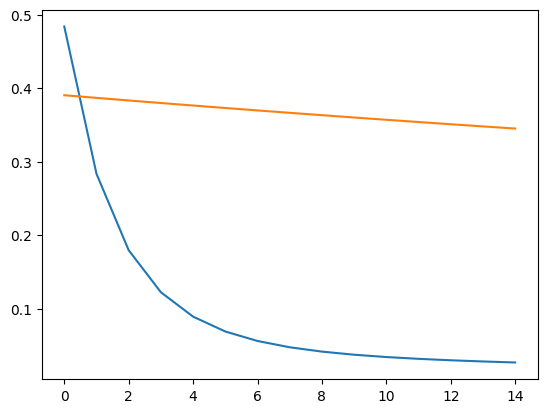

In [36]:
plt.plot( np.arange( ada3.n_iter ), ada3.losses_ )
plt.plot( np.arange( ada2.n_iter ), ada2.losses_ )

In [45]:
class AdaLineSGD:

    def __init__( self, eta = 0.01, n_iter = 15, 
                 shuffle = True, random_state = None ):

        self.eta = eta
        self.shuffle = shuffle
        self.w_init = False
        self.n_iter = n_iter
        self.random_state = random_state

    def fit( self, X, y ):
        self._init_w( X.shape[1] )
        self.losses_ = []

        for i in range( self.n_iter ):
           
            if self.shuffle:
                X, y = self._shuffle( X, y )

            losses = []
            for xi, target in zip( X, y ):
                losses.append( self._update_weights( xi, target ) )

            self.lossess_.append( np.mean( losses ) )

        return self

    def partial_fit( self, X, y ):
        
        if not self.w_init:
            self._init_w( X.shape[1] )

        if y.ravel().shape[0] > 1:
            for xi, target in zip( X, y ):
                self._update_weights( xi, target )
        else:
            self._update_weights( xi, target )

        return self

    def _shuffle( self, X, y ):
        rge
        
                

SyntaxError: incomplete input (3006546674.py, line 17)